<a href="https://colab.research.google.com/github/decoz/pyclass/blob/master/8_real_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8 이미지 파일 다루기

## 8.1 이미지 파일 불러오기 

#### 라이브러리 호출

In [0]:
from PIL import Image
from IPython.display import display
import numpy as np 

#### 이미지 파일 열기 

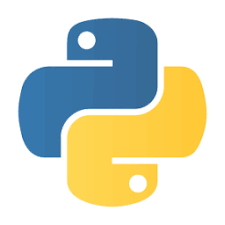

In [8]:
img = Image.open("py.png")
display(img)

#### url 에서 파일열기 

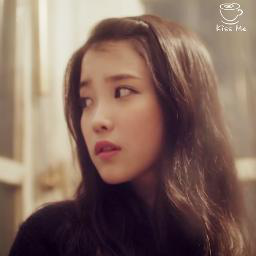

In [20]:
from urllib import request
img = Image.open(request.urlopen("https://c-sf.smule.com/sf/s35/arr/90/b9/df4e8541-b283-450f-9b94-ec79c9e30136.jpg") )
display(img)

## 8.2 이미지 <-> 배열 

In [21]:
arr = list(img.getdata())
w,h = img.size
print(w,h, arr[0])

256 256 (208, 194, 167)


#### 이미지를 배열로

In [0]:
color = (255,0,0) # red, green, blue
for x in range(w) :
  arr[ int(h/2) * w + x] = color 



#### 배열을 이미지로 변환 후 출력

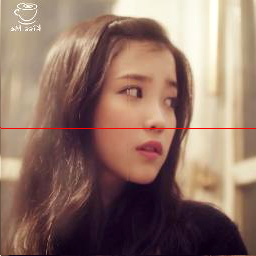

In [52]:
myimg = Image.fromarray( np.array(arr).astype('uint8').reshape(w,h,3) )
display( myimg )


#### 이미지를 파일로 저장 

In [0]:
myimg.save("sv.png")

## 8.3 이미지 변환

#### 좌우 반전

In [0]:
for y in range(h) :
  for x in range( int(w/2) ) :    
    arr[y * w + x], arr[y * w + w - x - 1] =  arr[y * w + w - x - 1], arr[y * w + x] 
    

  

#### 상하 반전


In [0]:
for y in range(int(h/2)) :
  for x in range( w ) :    
    n1 = y * w + x
    n2 = (h - y - 1) * w + x
    arr[n1], arr[n2] =  arr[n2], arr[n1] 
    

#### 색 반전

In [0]:
for y in range(h) :
  for x in range( w ) : 
    color1 = arr[y * w + x]
    arr[y * w + x] = (255-color1[0], 255-color1[1], 255-color1[2])



#### 밝기 조절

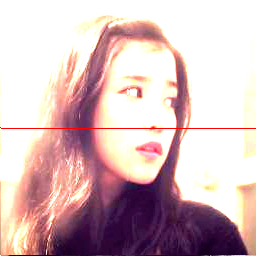

In [61]:
for y in range(h) :
  for x in range( w ) : 
    color = arr[y * w + x]
    c0 = min( int(color[0] * 1.1) , 255) 
    c1 = min( int(color[1] * 1.1) , 255) 
    c2 = min( int(color[2] * 1.1) , 255) 
    arr[y * w + x] = (c0, c1, c2)

myimg = Image.fromarray( np.array(arr).astype('uint8').reshape(w,h,3) )
display( myimg )


#### 이미지 크기 축소

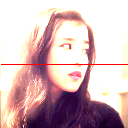

In [67]:
sw, sh = int(w/2), int(h/2)
narr = []
for sy in range(sh):
  for sx in range(sw):
    x,y = sx*2, sy*2
    narr.append( arr[y*w + x])
    
display( Image.fromarray( np.array(narr).astype('uint8').reshape(sw,sh,3) ) ) 


